<a href="https://colab.research.google.com/github/wallisonferreira/machine-learning-pavic/blob/main/pavic_08_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Dados - preparando...

In [33]:
from sklearn.datasets import make_circles

In [34]:
n_samples = 1000 # criar 1000 amostras

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [34]:
X[:5], X.shape, y.shape, y[:5], y.shape

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 (1000, 2),
 (1000,),
 array([1, 1, 1, 1, 0]),
 (1000,))

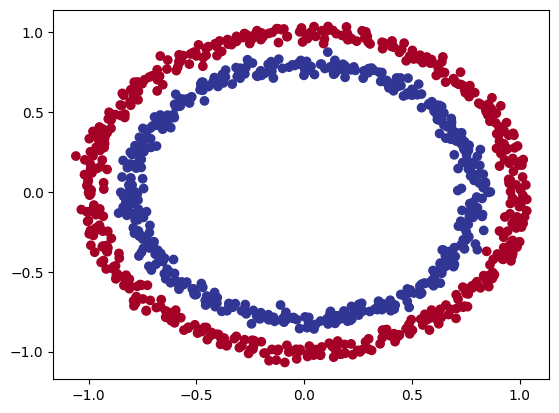

In [35]:
# visualizar nossos dados
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu);

## Transformar para torch

In [36]:
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

type(X)

torch.Tensor

## 1.3 Split dataset

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

# 2 Construir o modelo

In [38]:
import torch
from torch import nn

#device = "cuda" if torch.cuda.is_available() else "cpu"
device = 'cpu'

In [39]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.dense0 = nn.Linear(2, 20)
        self.dense1 = nn.Linear(20, 10)
        self.dense2 = nn.Linear(10, 1)
        self.relu   = nn.ReLU()
    def forward(self, x):
        x = self.dense0(x) # 2 -> 20
        x = self.relu(x)   # 2 -> 20
        x = self.dense1(x) # 20 -> 10
        x = self.relu(x)   # 10 -> 10
        x = self.dense2(x) # 10 -> 1
        return x

# instancia o modelo e coloca na gpu
model = CircleModel().to(device)
model

CircleModel(
  (dense0): Linear(in_features=2, out_features=20, bias=True)
  (dense1): Linear(in_features=20, out_features=10, bias=True)
  (dense2): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

## 2.1 Selecionar: Função de custo e otimizador

In [40]:
# usaria se somente a última
# camada tivesse com sigmoid
# loss_fn = nn.BCELoss()

# Binary Cross Entropy para 2 classes
loss_fn = nn.BCEWithLogitsLoss()

In [41]:
# SGD: Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

## 2.2 Criar métrica de avaliação

In [42]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

# 3 Treinar o modelo

In [43]:
torch.manual_seed(42)

epochs = 2000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # activates training mode: no action
    model.train()

    # 1 forward
    y_logits = model(X_train).squeeze() # Squeze: [[1, 5, 2, 3]] -> [1, 5, 2, 3]
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2 calcule o loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)

    # 3 zero grad
    optimizer.zero_grad()

    # 4 loss backward
    loss.backward()

    # 5 step
    optimizer.step()

    # ==============TESTE================
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | " +
              f"Loss: {loss:.5f} | " +
              f"Acc_train: {acc:.2f}% | " +
              f"Test_loss: {test_loss:.5f} | " +
              f"Test_Acc: {test_acc:.2f}% | ")

Epoch: 0 | Loss: 0.69478 | Acc_train: 43.88% | Test_loss: 0.69517 | Test_Acc: 47.50% | 
Epoch: 100 | Loss: 0.69125 | Acc_train: 58.25% | Test_loss: 0.69197 | Test_Acc: 53.50% | 
Epoch: 200 | Loss: 0.68889 | Acc_train: 53.62% | Test_loss: 0.68924 | Test_Acc: 54.00% | 
Epoch: 300 | Loss: 0.68550 | Acc_train: 60.88% | Test_loss: 0.68548 | Test_Acc: 64.50% | 
Epoch: 400 | Loss: 0.67918 | Acc_train: 67.00% | Test_loss: 0.67917 | Test_Acc: 69.00% | 
Epoch: 500 | Loss: 0.66758 | Acc_train: 68.75% | Test_loss: 0.66830 | Test_Acc: 73.50% | 
Epoch: 600 | Loss: 0.64409 | Acc_train: 80.00% | Test_loss: 0.64764 | Test_Acc: 79.50% | 
Epoch: 700 | Loss: 0.59269 | Acc_train: 92.62% | Test_loss: 0.60399 | Test_Acc: 91.50% | 
Epoch: 800 | Loss: 0.48951 | Acc_train: 97.75% | Test_loss: 0.51283 | Test_Acc: 97.00% | 
Epoch: 900 | Loss: 0.33257 | Acc_train: 99.25% | Test_loss: 0.36625 | Test_Acc: 99.00% | 
Epoch: 1000 | Loss: 0.19142 | Acc_train: 99.88% | Test_loss: 0.22707 | Test_Acc: 99.50% | 
Epoch: 1100

In [44]:
from helper_functions import plot_predictions, plot_decision_boundary

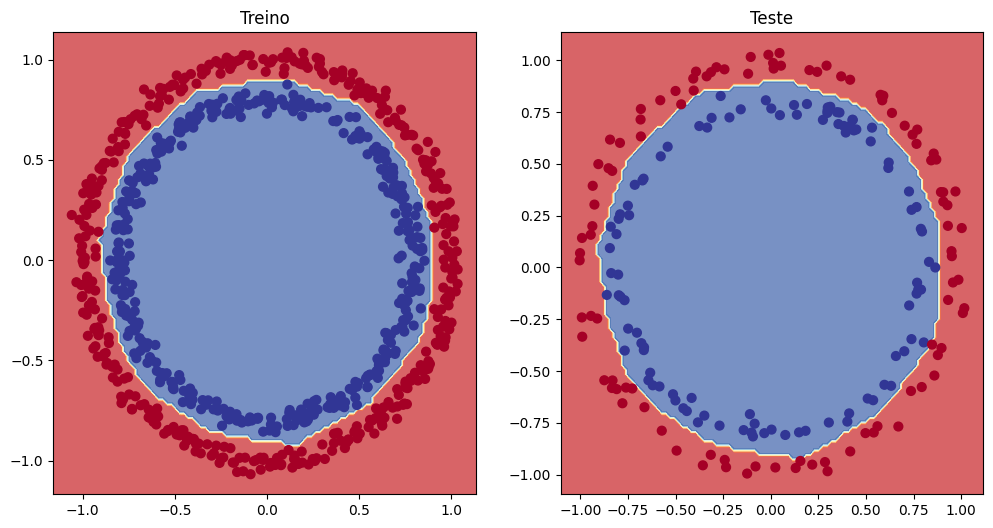

In [45]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Treino")
plot_decision_boundary(model, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Teste")
plot_decision_boundary(model, X_test, y_test)

# 4 Avaliar

In [46]:
model.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model(X_test))).squeeze()

y_preds[:5], y_test[:5]

(tensor([1., 0., 1., 0., 1.]), tensor([1., 0., 1., 0., 1.]))

In [47]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

1.0

# 2 Classificação Multiclasse

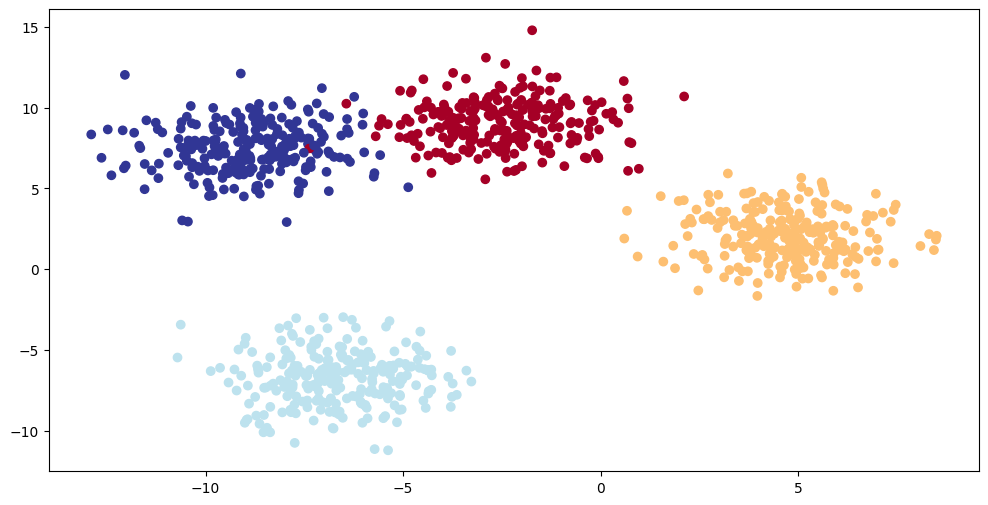

In [48]:
from sklearn.datasets import make_blobs

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# generate
X, y = make_blobs(n_samples=1000,
                  n_features=NUM_FEATURES,
                  centers=NUM_CLASSES,
                  cluster_std=1.5,
                  random_state=RANDOM_SEED)

# convert
X_blob = torch.from_numpy(X).type(torch.float)
y_blob = torch.from_numpy(y).type(torch.LongTensor)

# split
X_train, X_test, y_train, y_test = train_test_split(X_blob,
                                                    y_blob,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

#plot
plt.figure(figsize=(12, 6))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [50]:
import torch

In [52]:
# 2 Construir um modelo

#device = "cuda" torch.cuda.is_available() else "cpu"
device = "cpu"

In [55]:
import torch
from torch import nn

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """
        Inicializa hiper-parâmetros para problemas de classificação multi-classe.

        Args:
            input_features (int): Número de features de entrada.
            output_features (int): Número de saídas (classes) do modelo.
            hidden_units (int): Número de neurônios nas camadas ocultas, default 8.
        """

        super().__init__()
        self.dense0 = nn.Linear(input_features, hidden_units)
        self.dense1 = nn.Linear(hidden_units, hidden_units)
        self.dense2 = nn.Linear(hidden_units, output_features)
        self.relu   = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.dense0(x))
        x = self.relu(self.dense1(x))
        return self.dense2(x)

# calculando quantas entradas para a camada oculta
# (entradas + saidas / 2) => (2 + 4 / 2) ==> (3)
# uma unidade inteira acima (3) => (4)
model_blob = BlobModel(input_features=NUM_FEATURES,
                       output_features=NUM_CLASSES,
                       hidden_units=4).to(device)

model_blob

BlobModel(
  (dense0): Linear(in_features=2, out_features=4, bias=True)
  (dense1): Linear(in_features=4, out_features=4, bias=True)
  (dense2): Linear(in_features=4, out_features=4, bias=True)
  (relu): ReLU()
)

In [56]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_blob.parameters(), lr=0.1)

# 3 Treinar o modelo

In [77]:
epochs=100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_blob.train()

    # 1
    y_logits = model_blob(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # 2
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)

    # 3
    optimizer.zero_grad()

    # 4
    loss.backward()

    # 5
    optimizer.step()

    # Test
    model_blob.eval()
    with torch.inference_mode():
        test_logits = model_blob(X_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} Acc: {acc:.2f}% | Test_Loss: {test_loss:.5f} Test_Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.02428 Acc: 99.25% | Test_Loss: 0.01379 Test_Acc: 99.50%
Epoch: 10 | Loss: 0.02420 Acc: 99.25% | Test_Loss: 0.01370 Test_Acc: 99.50%
Epoch: 20 | Loss: 0.02412 Acc: 99.25% | Test_Loss: 0.01362 Test_Acc: 99.50%
Epoch: 30 | Loss: 0.02405 Acc: 99.25% | Test_Loss: 0.01354 Test_Acc: 99.50%
Epoch: 40 | Loss: 0.02398 Acc: 99.25% | Test_Loss: 0.01346 Test_Acc: 99.50%
Epoch: 50 | Loss: 0.02392 Acc: 99.25% | Test_Loss: 0.01339 Test_Acc: 99.50%
Epoch: 60 | Loss: 0.02385 Acc: 99.25% | Test_Loss: 0.01331 Test_Acc: 99.50%
Epoch: 70 | Loss: 0.02379 Acc: 99.25% | Test_Loss: 0.01324 Test_Acc: 99.50%
Epoch: 80 | Loss: 0.02373 Acc: 99.25% | Test_Loss: 0.01318 Test_Acc: 99.50%
Epoch: 90 | Loss: 0.02367 Acc: 99.25% | Test_Loss: 0.01311 Test_Acc: 99.50%


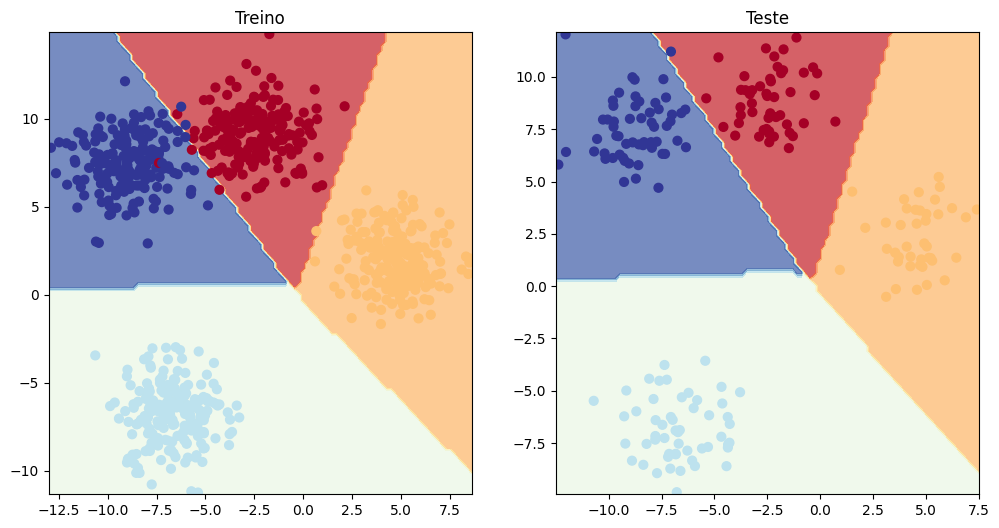

In [85]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Treino")
plot_decision_boundary(model_blob, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Teste")
plot_decision_boundary(model_blob, X_test, y_test)

# Evaluate model

In [80]:
model_blob.eval()
with torch.inference_mode():
    y_logits = model_blob(X_test)

y_preds_probs = torch.softmax(y_logits, dim=1)
y_preds = y_preds_probs.argmax(dim=1)

In [81]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3
    from torchmetrics import Accuracy

In [83]:
torchmetrics_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

torchmetrics_accuracy(y_preds, y_test) * 100

tensor(99.5000)